In [20]:
def evaluate_classifier(df_positive, df_negative, pos_label=1, neg_label=0, title_suffix="", save_path=None):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
    import os

    # Labels setzen
    df_positive = df_positive.copy()
    df_negative = df_negative.copy()
    df_positive['Label'] = pos_label
    df_negative['Label'] = neg_label

    # Kombinieren
    data = pd.concat([df_positive, df_negative], ignore_index=True)

    # Visualisierung: Histogramm
    plt.figure()
    sns.histplot(data=data, x='SVM RNA-class probability', hue='Label', kde=True, bins=50)
    plt.title(f"Distribution of SVM RNA-class probability {title_suffix}")
    plt.xlabel("SVM RNA-class probability")
    plt.ylabel("Anzahl")
    if save_path:
        filename = os.path.join(save_path, f"RNAz_Histogram_{title_suffix.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    # Vorbereitung
    X = data[['SVM RNA-class probability']]
    y = data['Label']
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Cross-Validation
    y_pred = cross_val_predict(model, X, y, cv=5, method='predict')
    y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    labels = ["Negative", "Positive"]

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix {title_suffix}")
    if save_path:
        filename = os.path.join(save_path, f"RNAz_Confusion_Matrix_{title_suffix.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

    print("\n Classification Report:\n", classification_report(y, y_pred))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})", color='red')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC-Curve {title_suffix}")
    plt.legend(loc="lower right")
    plt.grid(True)
    if save_path:
        filename = os.path.join(save_path, f"RNAz_ROC_Curve_{title_suffix.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


In [21]:
import pandas as pd

df_native = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/Native_Data/RNAz_Excel/native.xlsx", usecols=['SVM RNA-class probability']))
df_sissiz_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/Native_Data/RNAz_Excel/sissiz_mono.xlsx", usecols=['SVM RNA-class probability']))
df_sissiz_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/Native_Data/RNAz_Excel/sissiz_di.xlsx", usecols=['SVM RNA-class probability']))
df_multiperm_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/Native_Data/RNAz_Excel/multiperm_mono.xlsx", usecols=['SVM RNA-class probability']))
df_multiperm_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/Native_Data/RNAz_Excel/multiperm_di.xlsx", usecols=['SVM RNA-class probability']))
df_aln_shuffle = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Data/Native_Data/RNAz_Excel/alifoldz.xlsx", usecols=['SVM RNA-class probability']))


## SISSIz_MONO

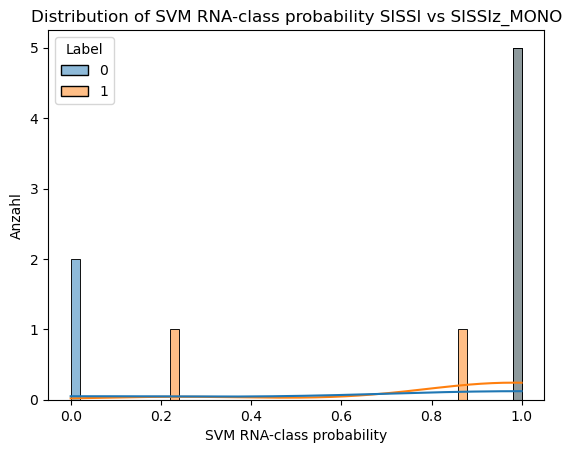

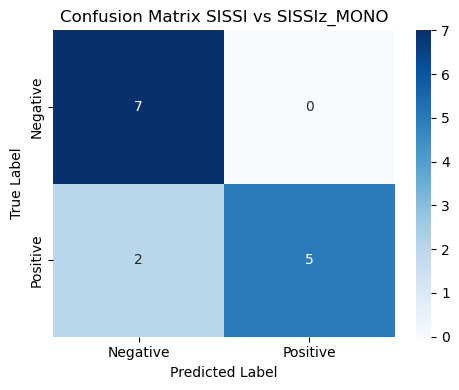


 Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.71      0.83         7

    accuracy                           0.86        14
   macro avg       0.89      0.86      0.85        14
weighted avg       0.89      0.86      0.85        14



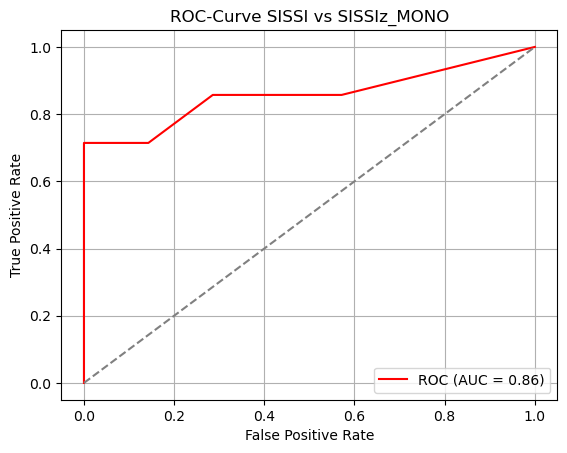

In [22]:
evaluate_classifier(df_native, df_sissiz_mono, title_suffix="SISSI vs SISSIz_MONO", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/RNAz/")

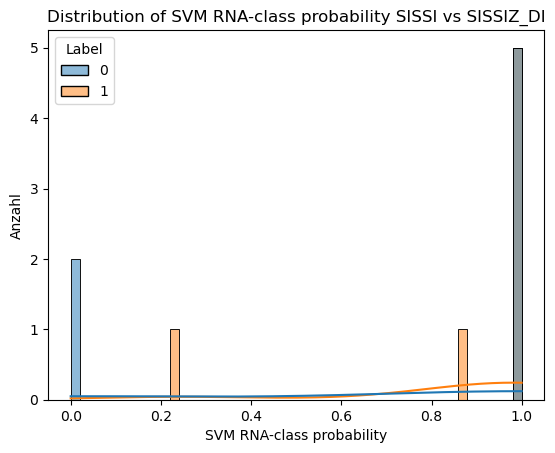

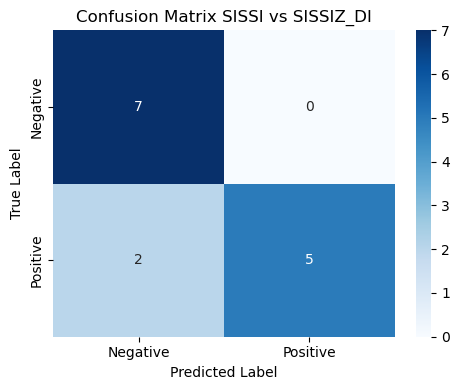


 Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.71      0.83         7

    accuracy                           0.86        14
   macro avg       0.89      0.86      0.85        14
weighted avg       0.89      0.86      0.85        14



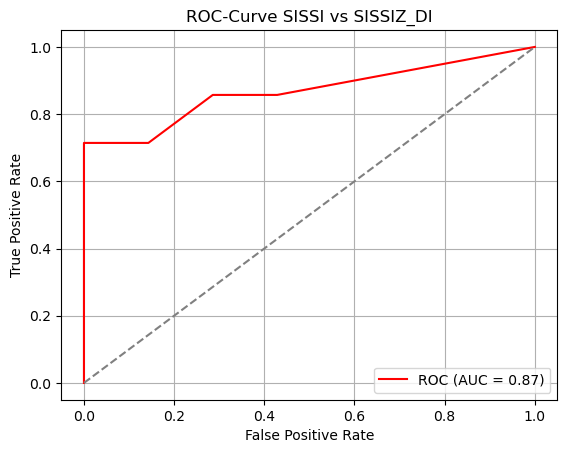

In [23]:
evaluate_classifier(df_native, df_sissiz_di, title_suffix="SISSI vs SISSIZ_DI", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/RNAz/")

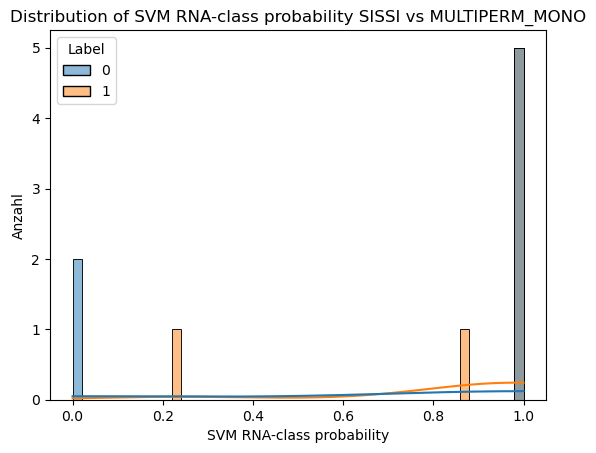

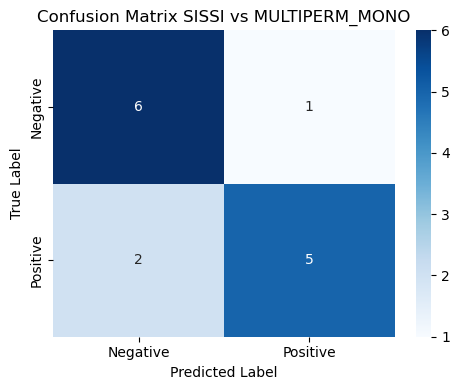


 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.83      0.71      0.77         7

    accuracy                           0.79        14
   macro avg       0.79      0.79      0.78        14
weighted avg       0.79      0.79      0.78        14



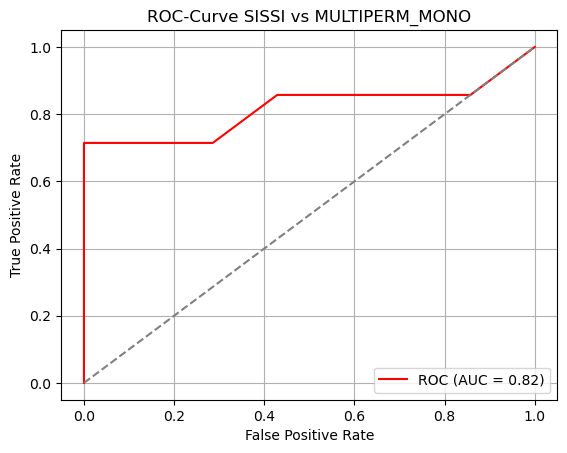

In [24]:
evaluate_classifier(df_native, df_multiperm_mono, title_suffix="SISSI vs MULTIPERM_MONO", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/RNAz/")

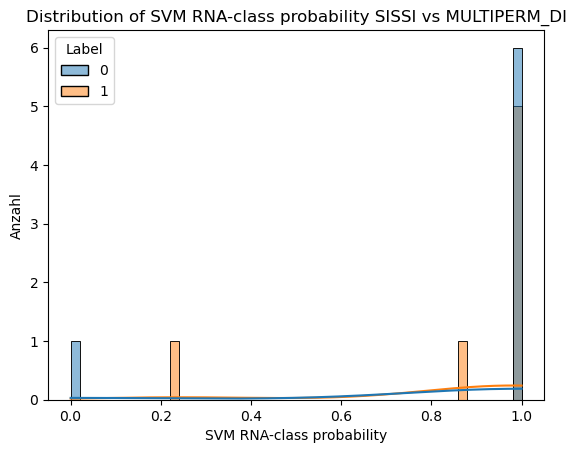

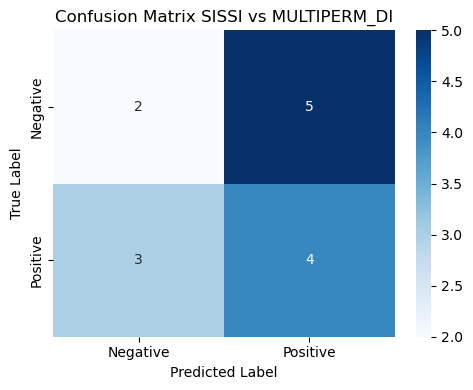


 Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.44      0.57      0.50         7

    accuracy                           0.43        14
   macro avg       0.42      0.43      0.42        14
weighted avg       0.42      0.43      0.42        14



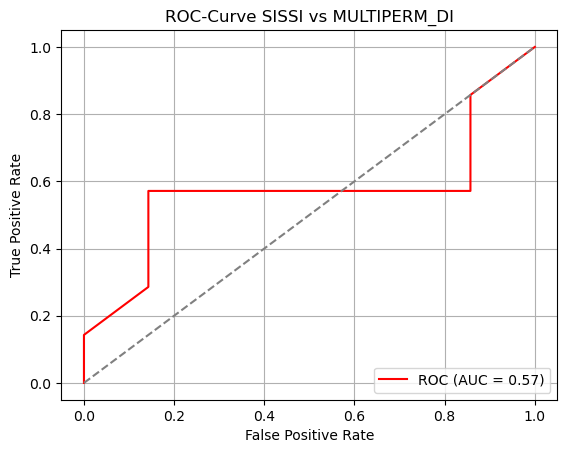

In [25]:
evaluate_classifier(df_native, df_multiperm_di, title_suffix="SISSI vs MULTIPERM_DI", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/RNAz/")

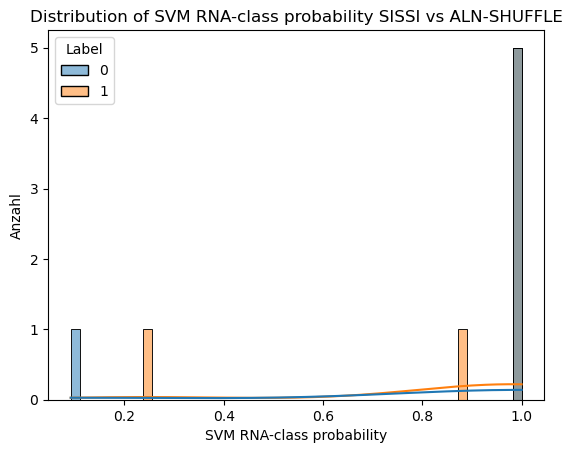

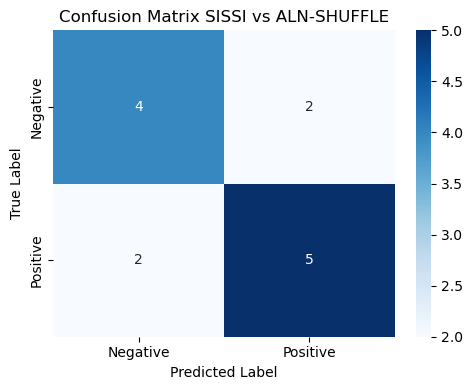


 Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.71      0.71      0.71         7

    accuracy                           0.69        13
   macro avg       0.69      0.69      0.69        13
weighted avg       0.69      0.69      0.69        13



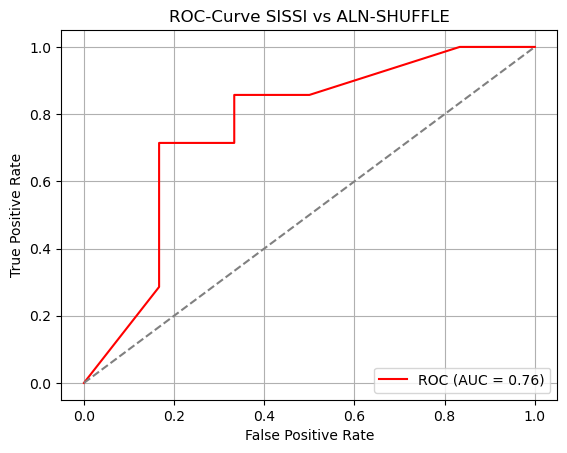

In [26]:
evaluate_classifier(df_native, df_aln_shuffle, title_suffix="SISSI vs ALN-SHUFFLE", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/RNAz/")